In [1]:
# 1. Basic Classification Methods
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implement Logistic Regression
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


In [3]:
# Exercise 2: Confusion Matrix and Classification Report

# Import necessary libraries
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=data.target_names)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



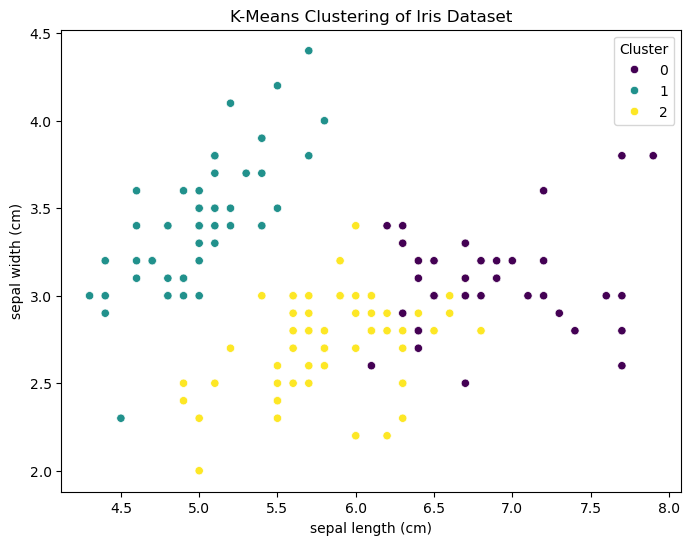

In [5]:
# 2. Clustering Techniques
# Exercise 3: Implementing K-Means Clustering
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the Iris dataset (for demonstration)
iris = load_iris()
X = iris.data

# Apply K-Means clustering with an arbitrary number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get the cluster labels
clusters = kmeans.labels_

# Visualize the clusters using a scatter plot
df = pd.DataFrame(X, columns=iris.feature_names)
df['Cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], hue=df['Cluster'], palette='viridis')
plt.title('K-Means Clustering of Iris Dataset')
plt.show()


Inertia: 28.545297810033105


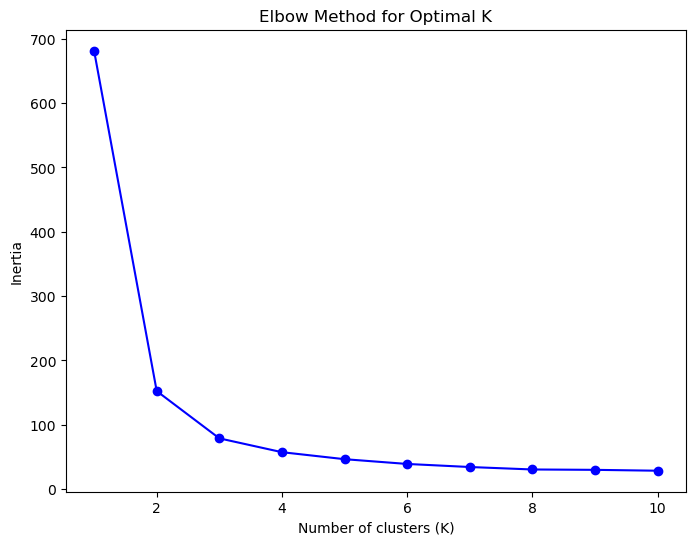

In [15]:
# Exercise 4: Evaluating K-Means Clustering


# Calculate inertia (sum of squared distances to closest cluster center)
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

# Elbow Method: Experiment with different numbers of clusters
inertia_values = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot inertia to visualize the "elbow"
plt.figure(figsize=(8, 6))
plt.plot(K, inertia_values, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [17]:

# Exercise 5: Implementing Hierarchical Clustering
# Step 1: Import Required Libraries
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


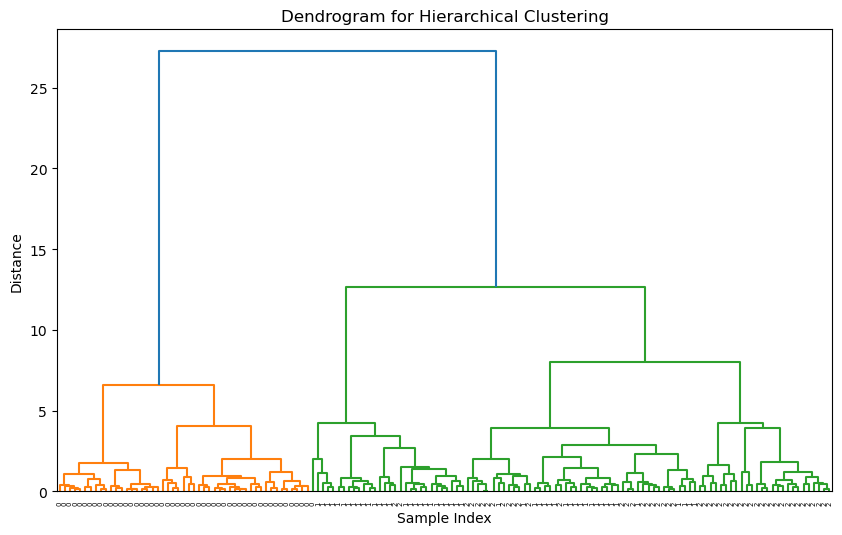

In [19]:
# Step 2: Perform Hierarchical Clustering
# Perform hierarchical clustering using the "ward" method
Z = linkage(X_scaled, method='ward')

# Visualize the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=iris.target)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


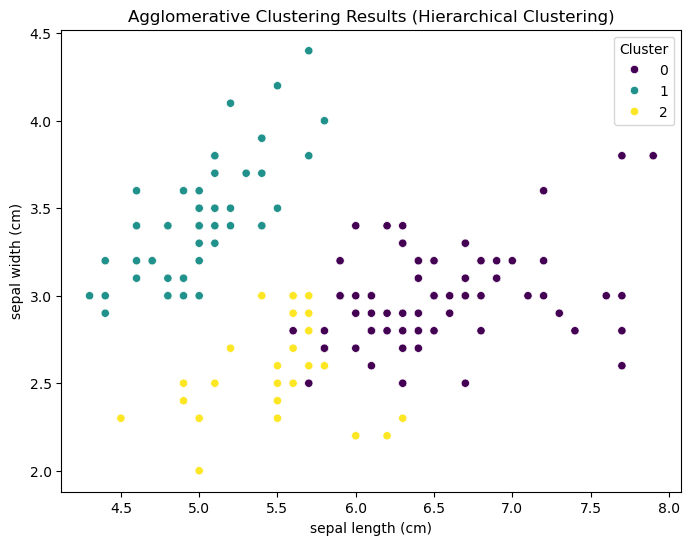

In [21]:
# Step 3: Apply Agglomerative Clustering
# Apply Agglomerative Clustering with 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_clustering.fit_predict(X_scaled)

# Visualize the clusters using a scatter plot
df = pd.DataFrame(X, columns=iris.feature_names)
df['Cluster'] = agg_clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], hue=df['Cluster'], palette='viridis')
plt.title('Agglomerative Clustering Results (Hierarchical Clustering)')
plt.show()



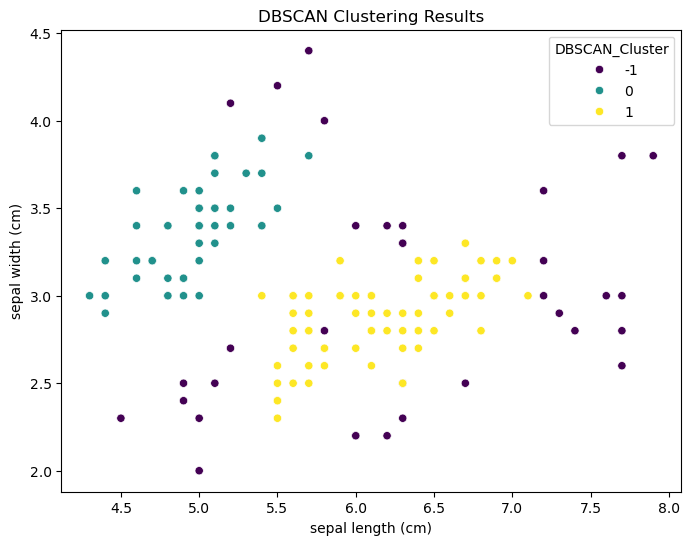

Silhouette Score: 0.36


In [23]:
# Exercise 6: Introduction to DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Standardize the data (already done in Exercise 5)
# X_scaled is the standardized dataset from previous steps
# Apply DBSCAN with some initial parameters

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_clusters = dbscan.fit_predict(X_scaled)

# Add the cluster labels to the DataFrame
df['DBSCAN_Cluster'] = db_clusters

# Visualize the clusters using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], hue=df['DBSCAN_Cluster'], palette='viridis')
plt.title('DBSCAN Clustering Results')
plt.show()

# Print the silhouette score for evaluating the clustering quality
silhouette_avg = silhouette_score(X_scaled, db_clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')


In [25]:
# Experiment with different values of eps and min_samples
for eps_value in [0.3, 0.5, 0.7]:
    for min_samples_value in [3, 5, 10]:
        dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
        db_clusters = dbscan.fit_predict(X_scaled)
        
        # Calculate silhouette score
        if len(set(db_clusters)) > 1:  # Silhouette score only works if more than 1 cluster is formed
            silhouette_avg = silhouette_score(X_scaled, db_clusters)
            print(f"DBSCAN with eps={eps_value}, min_samples={min_samples_value}, Silhouette Score: {silhouette_avg:.2f}")
        else:
            print(f"DBSCAN with eps={eps_value}, min_samples={min_samples_value}, resulted in 1 cluster.")


DBSCAN with eps=0.3, min_samples=3, Silhouette Score: -0.15
DBSCAN with eps=0.3, min_samples=5, Silhouette Score: -0.19
DBSCAN with eps=0.3, min_samples=10, resulted in 1 cluster.
DBSCAN with eps=0.5, min_samples=3, Silhouette Score: 0.16
DBSCAN with eps=0.5, min_samples=5, Silhouette Score: 0.36
DBSCAN with eps=0.5, min_samples=10, Silhouette Score: 0.01
DBSCAN with eps=0.7, min_samples=3, Silhouette Score: 0.51
DBSCAN with eps=0.7, min_samples=5, Silhouette Score: 0.52
DBSCAN with eps=0.7, min_samples=10, Silhouette Score: 0.42
